# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt

import joblib 

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../ex02/dayofweek.csv')
#df

In [3]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('dayofweek', axis=1), df['dayofweek'], test_size=0.2, random_state=21)

In [5]:
y_train.value_counts(normalize=True)

dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64

In [6]:
y_test.value_counts(normalize=True)

dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64

<Axes: xlabel='dayofweek'>

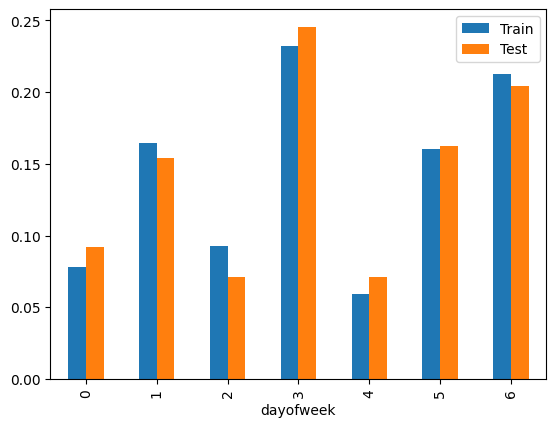

In [7]:
pd.DataFrame({
    'Train': y_train.value_counts(normalize=True),
    'Test': y_test.value_counts(normalize=True)
}).plot.bar()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('dayofweek', axis=1), df['dayofweek'], test_size=0.2, random_state=21, stratify=df['dayofweek'])

In [9]:
y_train.value_counts(normalize=True)

dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: proportion, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: proportion, dtype: float64

<Axes: xlabel='dayofweek'>

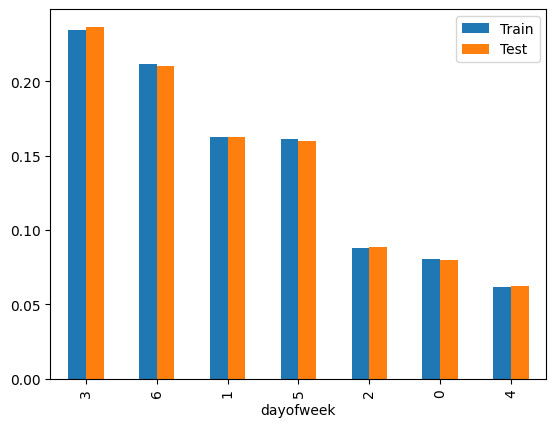

In [11]:
pd.DataFrame({
    'Train': y_train.value_counts(normalize=True),
    'Test': y_test.value_counts(normalize=True)
}).plot.bar()

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [12]:
model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=21, solver='liblinear')

In [13]:
y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
delta = 0.622 - model_accuracy
model_accuracy, delta
# 0.6272189

(0.6153846153846154, 0.0066153846153845786)

### b. SVM

In [14]:
base_model = SVC (kernel='linear', probability=True, random_state=21)
base_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=21)

In [15]:
pred = base_model.predict(X_test)
linear_accuracy = accuracy_score(y_test, pred)
delta = 0.703 - linear_accuracy
linear_accuracy, delta
#0.703

(0.7159763313609467, -0.01297633136094678)

### c. Decision tree

In [16]:
base_model = DecisionTreeClassifier(random_state=21, max_depth = 4)
base_model.fit(X_train, y_train)
pred = base_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, pred)
delta = 0.552 - tree_accuracy
tree_accuracy, delta
# 0.552

(0.5295857988165681, 0.02241420118343196)

### d. Random forest

In [17]:
base_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
base_model.fit(X_train,y_train)
pred = base_model.predict(X_test)
base_acc = accuracy_score(y_test, pred)
delta = 1.0 - base_acc
base_acc, delta

(0.9319526627218935, 0.06804733727810652)

Random forest

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [18]:
clf = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
scores = cross_val_score(clf, X, y, cv=10)
scores
# значения точности для каждого фолда

array([0.22485207, 0.4556213 , 0.49112426, 0.59171598, 0.64497041,
       0.68639053, 0.60119048, 0.35119048, 0.26785714, 0.21428571])

In [19]:
mean = scores.mean()
std = scores.std()
mean, std

(0.45291983657368284, 0.16960708432126997)

### b. SVM

In [20]:
clf = SVC (kernel='linear', probability=True, random_state=21)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.31952663, 0.47337278, 0.52071006, 0.59171598, 0.66863905,
       0.69230769, 0.75595238, 0.36904762, 0.375     , 0.28571429])

In [21]:
mean = scores.mean()
std = scores.std()
mean, std

(0.5051986475063398, 0.15857963555262297)

### c. Decision tree

In [22]:
clf= DecisionTreeClassifier(random_state=21, max_depth = 4)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.32544379, 0.28402367, 0.31360947, 0.52071006, 0.62130178,
       0.50295858, 0.44642857, 0.32738095, 0.27380952, 0.26785714])

In [23]:
mean = scores.mean()
std = scores.std()
mean, std

(0.3883523527754297, 0.11835394295385691)

### d. Random forest

In [24]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.33136095, 0.49112426, 0.69230769, 0.74556213, 0.74556213,
       0.82248521, 0.88690476, 0.75      , 0.60119048, 0.47619048])

In [25]:
mean = scores.mean()
std = scores.std()
mean, std

(0.654268808114962, 0.16586483503715305)

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [26]:
# базовая точность
clf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores = cross_val_score(clf, X, y, cv=10)
mean = scores.mean()
std = scores.std()
print(f"Base_model: Mean Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

Base_model: Mean Accuracy = 0.6543 ± 0.1659


In [27]:
# играем с n_estimators
for n in [50, 100, 200, 300]:
    clf = RandomForestClassifier(n_estimators=n, max_depth=25, random_state=21)
    scores = cross_val_score(clf, X, y, cv=10)
    print(f"n_estimators={n}: {scores.mean():.4f} ± {scores.std():.4f}")

n_estimators=50: 0.6519 ± 0.1796
n_estimators=100: 0.6543 ± 0.1659
n_estimators=200: 0.6596 ± 0.1767
n_estimators=300: 0.6555 ± 0.1773


In [28]:
for depth in [10, 20, 25, 30, None]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=21)
    scores = cross_val_score(clf, X, y, cv=10)
    print(f"max_depth={depth}: {scores.mean():.4f} ± {scores.std():.4f}")

max_depth=10: 0.5896 ± 0.1686
max_depth=20: 0.6584 ± 0.1670
max_depth=25: 0.6543 ± 0.1659
max_depth=30: 0.6477 ± 0.1726
max_depth=None: 0.6501 ± 0.1709


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 25, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.5374607132196724


In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

clf = RandomForestClassifier(random_state=21)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                 n_iter=50, cv=5, n_jobs=-1, verbose=1)
random_search.fit(X, y)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25}
Best score: 0.5333169455515951


In [31]:
best_params = {'n_estimators': 100, 'max_depth': 20, 
              'min_samples_split': 5, 'max_features': 'log2'}

clf = RandomForestClassifier(**best_params, random_state=21)
scores = cross_val_score(clf, X, y, cv=10)
print(f"Optimized: Mean Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

Optimized: Mean Accuracy = 0.6566 ± 0.1733


In [ ]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, max_features='log2', random_state=21)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
final_accuracy

0.908284023668639

In [35]:
def draw_barh(coefs, names, top_n):
    importance = np.sum(np.abs(coefs), axis=0)
    feature_importance = pd.DataFrame({'feature': names,'importance': importance, 'avg_coef': np.mean(coefs, axis=0)})
    top_features = feature_importance.sort_values('importance', ascending=False).head(top_n)
    
    plt.figure(figsize=(15, 8))
    y_pos = np.arange(len(top_features))
    

    colors = ['green' if x > 0 else 'red' for x in top_features['avg_coef']]
    bars = plt.barh(top_features['feature'], top_features['importance'],color=colors)

    max_val = top_features['importance'].max()
    plt.xlim(0, max_val * 1.1)

    plt.yticks(y_pos, top_features['feature'])
    plt.title('Top Features')
    plt.xlabel("Coefficient Value")
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f"{width:.2f}", ha='left', va='center', color='black')
    
    
    plt.tight_layout()
    plt.show()
    print(top_features)

In [36]:
importances = final_model.feature_importances_
coefs = importances.reshape(1, -1)

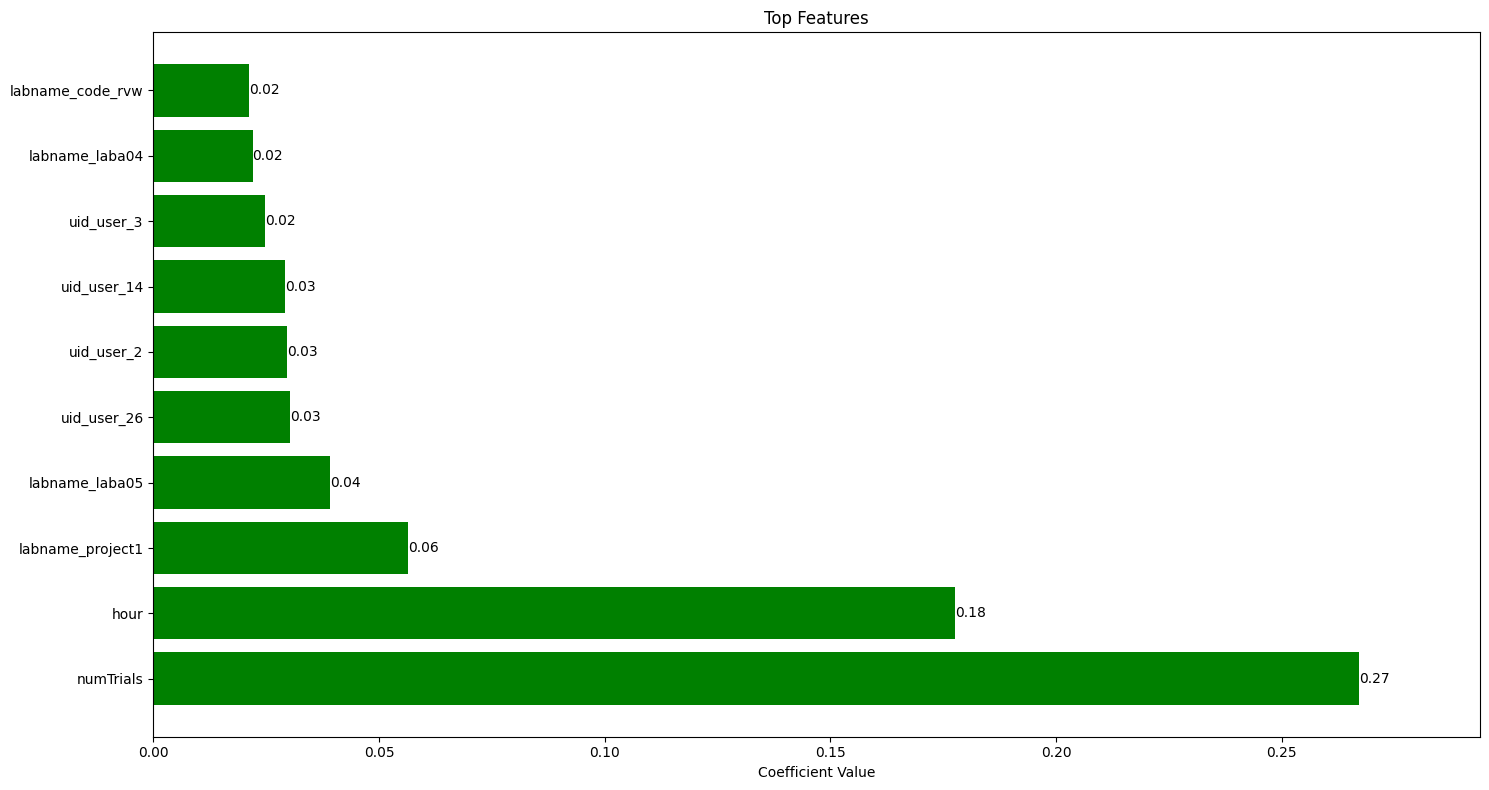

             feature  importance  avg_coef
0          numTrials    0.267201  0.267201
1               hour    0.177707  0.177707
12  labname_project1    0.056390  0.056390
9     labname_laba05    0.039244  0.039244
32       uid_user_26    0.030361  0.030361
25        uid_user_2    0.029543  0.029543
19       uid_user_14    0.029231  0.029231
36        uid_user_3    0.024684  0.024684
7     labname_laba04    0.021981  0.021981
2   labname_code_rvw    0.021236  0.021236


In [39]:
draw_barh(coefs, X.columns, 10)

In [ ]:
file_name = 'final_model_ex03.pkl' 
joblib.dump(final_model, file_name) 

['final_model_ex03.pkl']

In [42]:
loaded_model = joblib.load(file_name) 
pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, pred)
loaded_accuracy, final_accuracy


(0.908284023668639, 0.908284023668639)